# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [6]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [7]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




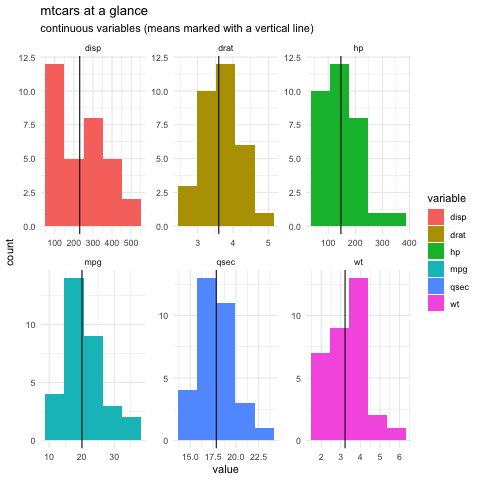

In [19]:
%%R 

# Define continuous and discrete variables
continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables <- c('vs', 'am', 'gear', 'carb')

# Convert the mtcars dataset to long format using pivot_longer
mtcars_long <- mtcars %>% 
  pivot_longer(!name, names_to = 'variable', values_to = 'value')

# Filter and select only continuous variables from the long format data
to_plot <- mtcars_long %>% 
  filter(variable %in% continuous_variables)

# Calculate means of continuous variables for vertical lines in histograms
histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

# Create a histogram for each continuous variable with means marked as vertical lines
plot_continuous_histograms <- ggplot(to_plot) +
  aes(x = value, fill = variable, group = variable) +
  geom_histogram(bins = 5) +
  geom_vline(data = histogram_means, aes(xintercept = mean)) +
  facet_wrap(~variable, scales = 'free') +
  theme_minimal() +
  labs(
    title = 'mtcars at a glance',
    subtitle = 'continuous variables (means marked with a vertical line)'
  )

# Print the histograms 
print(plot_continuous_histograms)


👉 Run the cell below, observe the chart it creates. Then comment the code to demonstrate you understand what it does. Replace every `#add comment here` with a comment explaining what that part of the code does. If you're not sure, talk to ChatGPT about it.

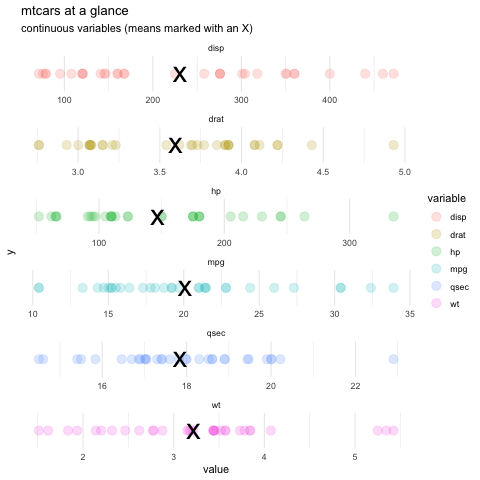

In [20]:
%%R 

# Create a dot plot for each continuous variable with means marked as "X"
plot_continuous_dotplot <- ggplot(to_plot) + #add comment here
  aes(x = value, y = 1, color = variable) + #add comment here
  geom_point(size = 4, alpha = .2) + #add comment here
  stat_summary( #add comment here
    fun.y = mean,
    geom = "point",
    shape = 'x',
    size = 10,
    color = "black",
    alpha = 1,
    orientation = 'y'
  ) +
  facet_wrap(~variable, scales = 'free', ncol = 1) + #add comment here
  theme_minimal() + #add comment here
  labs( #add comment here
    title = 'mtcars at a glance',
    subtitle = 'continuous variables (means marked with an X)'
  ) +
  theme( #add comment here
    axis.text.y = element_blank(),     
    axis.ticks.y = element_blank(),    
    panel.grid.major.y = element_blank(),
    panel.grid.minor.y = element_blank() 
  )

#add comment here
print(plot_continuous_dotplot)


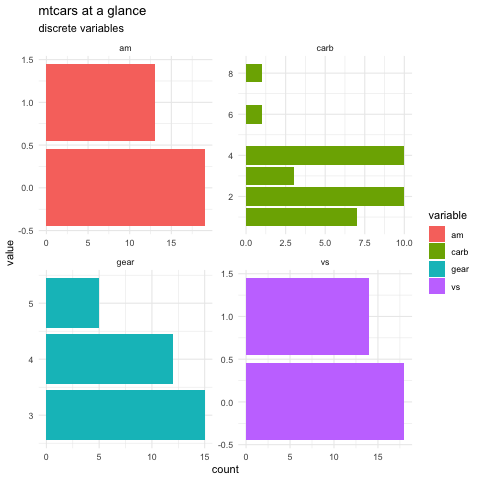

In [10]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

## Visual Choices Questions

👉 What is a discrete variable vs a continuous variable?
👉 Why did I chose a bar chart for the continuous variables?

In [ ]:
# answer here

👉 What can you tell me about these cars after looking at the charts above?

In [ ]:
# answer here

👉 What further questions about this data do you have now? 

In [ ]:
# answer here

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


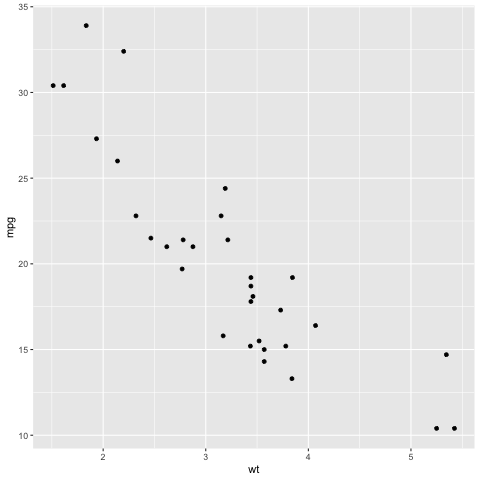

In [ ]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    geom_point()

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    b. What can't we conclude about fuel efficiency and weight

    c. What further questions do you have about this data?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

(replace the text in this cell with your question)

### 👉 Charts or summary statistics to help answer your question

In [ ]:
%%R 

# ggplot code here

### 👉 Reflection

a. What can we conclude?

b. What can't we conclude?

c. What further questions does this analysis raise?
